In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb 
%matplotlib inline
import pgeocode

In [4]:
xls = pd.ExcelFile('kpmg_final.xlsx')

In [5]:
def readSheet(excelfile,sheetName):
    '''load excel sheets into a pandas dataframe'''
    df = pd.read_excel(xls, sheetName,index_col=None,header=None)
    df = df.iloc[1:,:]
    df=df.rename(columns=df.iloc[0]).drop(df.index[0])
    df = df.reset_index(drop=True)
    #df_transactions = df_transactions.loc[:,df_transactions.columns.notnull()]
    return df 

In [6]:
df_transactions = readSheet(xls,'Transactions')
df_new_customer = readSheet(xls,'NewCustomerList')
df_demographic = readSheet(xls,'CustomerDemographic')
df_address = readSheet(xls,'CustomerAddress')

### The transactions table assessment

In [7]:
df_transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#drop nan columns (with NaN headers)
df_transactions = df_transactions.loc[:,df_transactions.columns.notnull()]
df_transactions.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [9]:
#change dtypes
df_transactions.transaction_date = pd.to_datetime(df_transactions.transaction_date)
df_transactions.online_order = df_transactions.online_order.astype('bool')
df_transactions[['order_status','brand','product_line']] = df_transactions[['order_status','brand','product_line']].astype('category')
df_transactions[['list_price','standard_cost']] = df_transactions[['list_price','standard_cost']].astype(float)


In [10]:
df_transactions.product_first_sold_date = pd.to_datetime(df_transactions.product_first_sold_date)
df_transactions.product_first_sold_date.head()

0   1970-01-01 00:00:00.000041245
1   1970-01-01 00:00:00.000041701
2   1970-01-01 00:00:00.000036361
3   1970-01-01 00:00:00.000036145
4   1970-01-01 00:00:00.000042226
Name: product_first_sold_date, dtype: datetime64[ns]

In [11]:
#ordinal categorical variable 
pclass = ['high','medium','low']
psize = ['large','medium','small']
product_pclass = pd.api.types.CategoricalDtype(ordered=True,categories=pclass)
product_psize = pd.api.types.CategoricalDtype(ordered=True,categories=psize)
df_transactions.product_class = df_transactions.product_class.astype(product_pclass)
df_transactions.product_size = df_transactions.product_size.astype(product_psize)

In [12]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  object        
 1   product_id               20000 non-null  object        
 2   customer_id              20000 non-null  object        
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  bool          
 5   order_status             20000 non-null  category      
 6   brand                    19803 non-null  category      
 7   product_line             19803 non-null  category      
 8   product_class            19803 non-null  category      
 9   product_size             19803 non-null  category      
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [13]:
df_transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order                 0
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

**1% of the transactions data have missing values (197 rows of 20000), so I will remove those rows.**

In [14]:
df_transactions.dropna(inplace=True)
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  object        
 1   product_id               19803 non-null  object        
 2   customer_id              19803 non-null  object        
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19803 non-null  bool          
 5   order_status             19803 non-null  category      
 6   brand                    19803 non-null  category      
 7   product_line             19803 non-null  category      
 8   product_class            19803 non-null  category      
 9   product_size             19803 non-null  category      
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [15]:
df_transactions.duplicated().sum()

0

In [16]:
df_transactions.describe()

,list_price,standard_cost
count,19803.000000,19803.000000
mean,1107.997866,556.046951
std,582.770460,405.955660
min,12.010000,7.210000
25%,575.270000,215.140000
50%,1163.890000,507.580000
75%,1635.300000,795.100000
max,2091.470000,1759.850000


In [17]:
#check all the categorical variable are clean
df_transactions.product_class.value_counts()
df_transactions.product_size.value_counts()
df_transactions.order_status.value_counts()
df_transactions.online_order.value_counts()
#df_transactions.transaction_date.max()

True     10097
False     9706
Name: online_order, dtype: int64

### New 1000 Customers list

In [18]:
df_new_customer = df_new_customer.loc[:,df_new_customer.columns.notnull()]

In [19]:
df_new_customer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [20]:
df_new_customer.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [21]:
df_new_customer.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [22]:
df_new_customer.property_valuation.value_counts()

9     173
8     161
7     136
10    116
6      69
11     61
5      57
4      53
3      51
12     46
2      42
1      30
7       2
6       1
8       1
11      1
Name: property_valuation, dtype: int64

In [23]:
df_new_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   first_name                           1000 non-null   object
 1   last_name                            971 non-null    object
 2   gender                               1000 non-null   object
 3   past_3_years_bike_related_purchases  1000 non-null   object
 4   DOB                                  983 non-null    object
 5   job_title                            894 non-null    object
 6   job_industry_category                835 non-null    object
 7   wealth_segment                       1000 non-null   object
 8   deceased_indicator                   1000 non-null   object
 9   owns_car                             1000 non-null   object
 10  tenure                               1000 non-null   object
 11  address                              1000 no

In [24]:
df_new_customer.DOB = pd.to_datetime(df_new_customer.DOB)
df_new_customer.owns_car = df_new_customer.owns_car.astype('bool')
df_new_customer[['gender','state','wealth_segment','job_title','job_industry_category']] = df_new_customer[['gender','state','wealth_segment','job_title','job_industry_category']].astype('category')
df_new_customer[['tenure','property_valuation','Rank','past_3_years_bike_related_purchases']] = df_new_customer[['tenure','property_valuation','Rank','past_3_years_bike_related_purchases']].astype(float)
df_new_customer.Value = df_new_customer.Value.astype(int)

In [25]:
df_new_customer.gender.value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [26]:
df_new_customer.gender = df_new_customer.gender.replace('U','Unknown')

In [27]:
df_new_customer.gender.value_counts()

Female     513
Male       470
Unknown     17
Name: gender, dtype: int64

In [28]:
df_new_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   category      
 3   past_3_years_bike_related_purchases  1000 non-null   float64       
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    category      
 6   job_industry_category                835 non-null    category      
 7   wealth_segment                       1000 non-null   category      
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   bool          
 10  tenure       

### Old customers demographic dataset

In [29]:
df_demographic = df_demographic.loc[:,df_demographic.columns.notnull()]

In [30]:
df_demographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [31]:
df_demographic.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

In [32]:
df_demographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [33]:
df_demographic.duplicated().sum()

0

In [34]:
df_demographic.DOB = pd.to_datetime(df_demographic.DOB)
df_demographic.owns_car = df_demographic.owns_car.astype('bool')
df_demographic[['gender','wealth_segment','job_title','job_industry_category']] = df_demographic[['gender','wealth_segment','job_title','job_industry_category']].astype('category')
df_demographic[['tenure','past_3_years_bike_related_purchases']] = df_demographic[['tenure','past_3_years_bike_related_purchases']].astype(float)

In [35]:
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   object        
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   category      
 4   past_3_years_bike_related_purchases  4000 non-null   float64       
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   category      
 7   job_industry_category                3344 non-null   category      
 8   wealth_segment                       4000 non-null   category      
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [36]:
df_demographic.gender.value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [37]:
#clean the inconsistency in the gender column
df_demographic.gender = df_demographic.gender.replace('U','Unknown').replace('F','Female').replace('Femal','Female').replace('M','Male')

In [38]:
df_demographic.gender.value_counts()

Female     2039
Male       1873
Unknown      88
Name: gender, dtype: int64

In [39]:
df_demographic.owns_car.value_counts()
df_demographic.DOB.describe()

<ipython-input-39-bffce4615f41>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_demographic.DOB.describe()


count                    3913
unique                   3448
top       1978-01-30 00:00:00
freq                        7
first     1843-12-21 00:00:00
last      2002-03-11 00:00:00
Name: DOB, dtype: object

### Customers Address table

In [40]:
df_address = df_address.loc[:,df_address.columns.notnull()]

In [41]:
df_address.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [42]:
df_address.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [43]:
df_address.duplicated().sum()

0

In [44]:
df_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


In [45]:
df_address.property_valuation = df_address.property_valuation.astype(int)
df_address.state = df_address.state.astype('category')

In [46]:
df_address.state.value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [47]:
df_address.address.sample(5)

1732    33006 Petterle Trail
2848          52 Ruskin Pass
1186    135 Crest Line Drive
3747    08261 Aberg Junction
1696    53141 Merrick Street
Name: address, dtype: object

In [48]:
df_address.state = df_address.state.replace('New South Wales','NSW').replace('Victoria','VIC')
df_address.state.value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [49]:
df_demographic = df_demographic.drop(['default'],axis=1)

In [50]:
df_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [2]:
#list(set(df_demographic.customer_id) - set(df_address.customer_id))

In [1]:
#id_dem = list(df_demographic.customer_id)
#id_add = list(df_address.customer_id)

#list(set(id_dem) - set(id_add))

## Tidiness

In [53]:
#these datasets of old customers and transactions are one observational unit.

In [54]:
#merge customers demographic and customers address on left join on customer id

In [55]:
df_customer_final = pd.merge(df_demographic,df_address,how='left',on = 'customer_id')
print(df_customer_final.head())
print(df_customer_final.shape)

  customer_id      first_name  last_name  gender  \
0           1         Laraine  Medendorp  Female   
1           2             Eli    Bockman    Male   
2           3           Arlin     Dearle    Male   
3           4          Talbot        NaN    Male   
4           5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                 93.0 1953-10-12     Executive Secretary   
1                                 81.0 1980-12-16  Administrative Officer   
2                                 61.0 1954-01-20      Recruiting Manager   
3                                 33.0 1961-10-03                     NaN   
4                                 56.0 1977-05-13           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator  owns_car  \
0                Health      Mass Customer                  N      True   
1    Financial Services      Mass Customer                  N      True   

In [56]:
# to add new customer ==> add customer id first then concat the two dataframes
df_new_customer.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [57]:
df_customer_final.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [58]:
#create a copy for 1000 new customers to add id for each
df_new_customer_copy = df_new_customer.copy()

In [59]:
#assign ids to each new customers incrementation 
#first_id = df_customer_final.customer_id.max()+1
#df_new_customer_copy.insert(0,'customer_id',range(first_id,first_id+len(df_new_customer_copy)))

In [60]:
#this is a dataset that contains info about all customers with and without trasnactions history==> As I want to predict the target customers out of the new 1000
#I will not used this dataset for the analysis#
# df_customer_master = pd.concat([df_customer_final,df_new_customer_copy],ignore_index=True)
# df_customer_master

In [61]:
#df_customer_master.head()

In [62]:
# df_demographic
# df_address
# df_customer_master

## EDA

I will explore from two perspectives: the customers and the company profits from goods

In [63]:
## new _customers is the 1000 new customers targeted
new_customers = df_new_customer.copy()
#master is the merged demographic and address of the users with a transactions history
master = df_customer_final.copy()
#some cleaning for the merged datasets
master.iloc[33,5] = '1943-12-21'
master.DOB = pd.to_datetime(master.DOB)
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   object        
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   category      
 4   past_3_years_bike_related_purchases  4000 non-null   float64       
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   category      
 7   job_industry_category                3344 non-null   category      
 8   wealth_segment                       4000 non-null   category      
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [64]:
new_customers['year_of_birth'] = new_customers['DOB'].dt.year

In [65]:
master['year_of_birth'] = master['DOB'].dt.year
master.year_of_birth

0       1953.0
1       1980.0
2       1954.0
3       1961.0
4       1977.0
         ...  
3995    1975.0
3996    2001.0
3997       NaN
3998    1973.0
3999    1991.0
Name: year_of_birth, Length: 4000, dtype: float64

In [66]:
#create an age column from the date of birth for both existing and new customers
new_customers['age'] = 2017 - new_customers.year_of_birth
new_customers = new_customers.query('age.notnull()')

In [67]:
master['age'] = 2017 - master.year_of_birth
master = master.query('age.notnull()')

## Customers demographics

### age distribution

<Figure size 576x360 with 0 Axes>

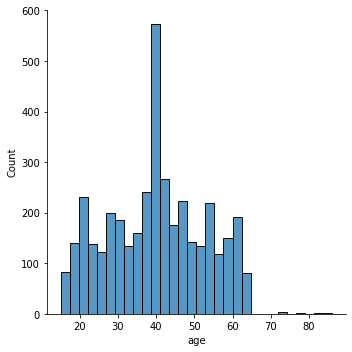

In [68]:

#age distributin 
plt.figure(figsize=[8,5])
sb.displot(master,x='age')

In [69]:
new_customers['bins'] = pd.cut(new_customers.age,bins=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90])
master['bins'] = pd.cut(master.age,bins=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90])
#df2 = master.groupby('bins').bins.count()

In [70]:
#df2.plot(kind='bar');

In [71]:
base_color = sb.color_palette()[0]

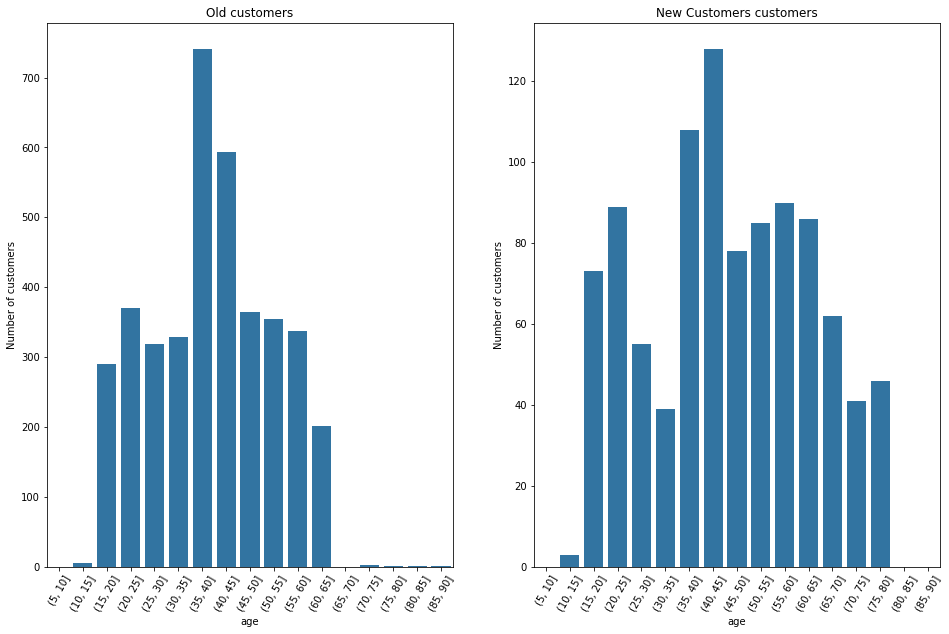

In [72]:
plt.figure(figsize=[16,10])
plt.subplot(1,2,1)
sb.countplot(data=master,x='bins',color=base_color)
plt.xticks(rotation=60)
plt.xlabel('age')
plt.ylabel('Number of customers')
plt.gca().set_title('Old customers')

plt.subplot(1,2,2)
ax = sb.countplot(data=new_customers,x='bins',color=base_color)
ax.tick_params(axis='x', labelrotation=90)
plt.xticks(rotation=60)
plt.xlabel('age')
plt.ylabel('Number of customers')
plt.gca().set_title('New Customers customers');

The majority of customers are between 35 and 45 years old.

### gender distribution

Text(0.5, 1.0, 'New customers')

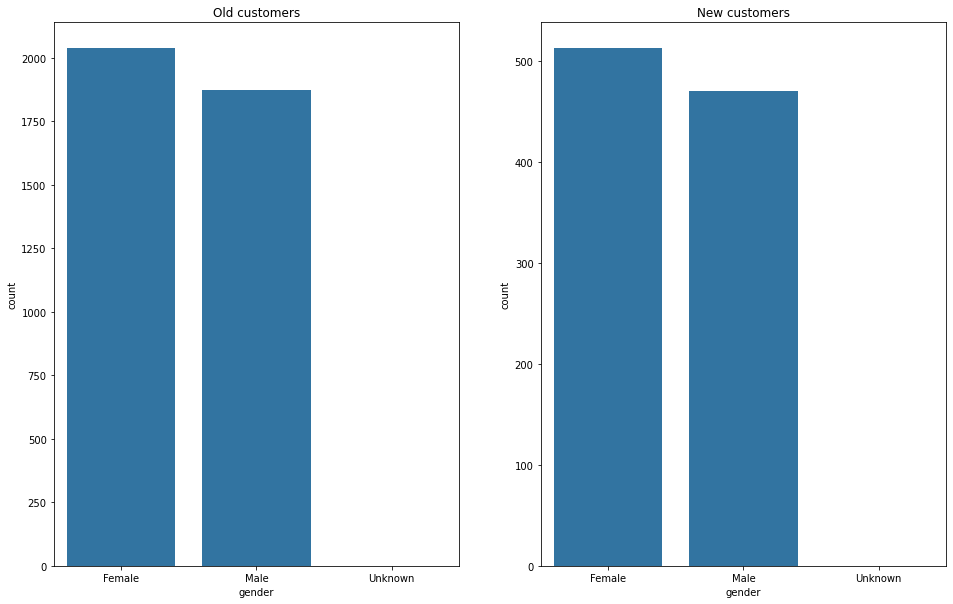

In [73]:
plt.figure(figsize=[16,10])
plt.subplot(1,2,1)
sb.countplot(data=master,x='gender',color=base_color)
plt.gca().set_title('Old customers')
plt.subplot(1,2,2)
sb.countplot(data=new_customers,x='gender',color=base_color)
plt.gca().set_title('New customers')

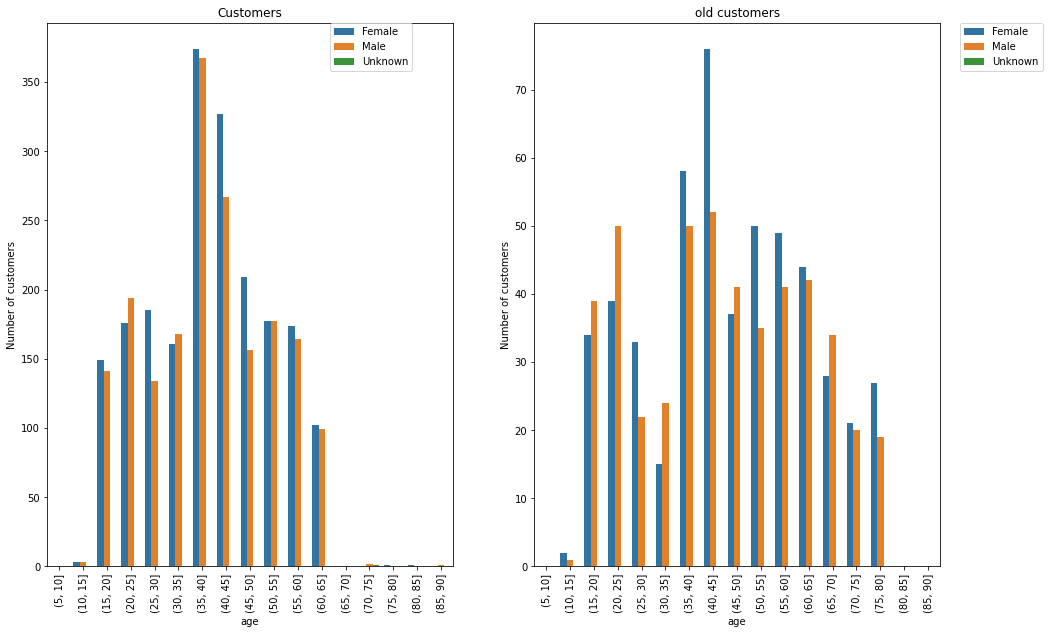

In [74]:
plt.figure(figsize=[16,10])
plt.subplot(1,2,1)
sb.countplot(data=master,x='bins',hue='gender')
plt.xticks(rotation=90);
plt.gca().set_title('Customers')
plt.xlabel('age')
plt.ylabel('Number of customers')
plt.legend(bbox_to_anchor=(0.9, 1), loc=1, borderaxespad=0.)
plt.subplot(1,2,2)
sb.countplot(data=new_customers,x='bins',hue='gender')
plt.xticks(rotation=90);
plt.gca().set_title('old customers')
plt.xlabel('age')
plt.ylabel('Number of customers')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The most female and male customers are between 35 and 40 years old, while there are more females between 40 and 45 than males.

In [75]:
master_copy = master.copy()

In [76]:
df_old_all =  pd.merge(df_transactions,master,how='left',on = 'customer_id')
df_old_all.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,owns_car,tenure,address,postcode,state,country,property_valuation,year_of_birth,age,bins
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,True,10.0,984 Hoepker Court,3064,VIC,Australia,6.0,1955.0,62.0,"(60, 65]"
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,True,10.0,4 Shopko Circle,2196,NSW,Australia,5.0,1979.0,38.0,"(35, 40]"
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,...,True,22.0,586 Miller Parkway,2835,NSW,Australia,1.0,1977.0,40.0,"(35, 40]"
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,True,16.0,1617 Harper Parkway,2096,NSW,Australia,10.0,1962.0,55.0,"(50, 55]"
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,...,True,2.0,0601 Stephen Place,2292,NSW,Australia,7.0,1996.0,21.0,"(20, 25]"


**I think it is important to explore the number of purchases or transactions by gender and age.**

Text(0.5, 1.0, 'The number of transactions by the age of customers')

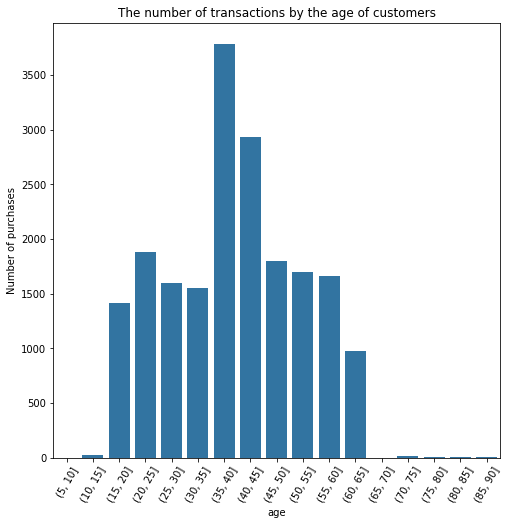

In [77]:
plt.figure(figsize=[8,8])
sb.countplot(data=df_old_all,x='bins',color=base_color)
plt.xticks(rotation=60)
plt.xlabel('age')
plt.ylabel('Number of purchases')
plt.title('The number of transactions by the age of customers')

Text(0.5, 1.0, 'The number of transactions by the gender of customers')

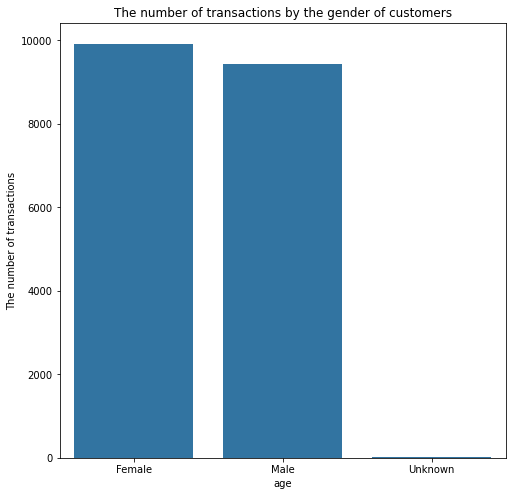

In [78]:
plt.figure(figsize=[8,8])
sb.countplot(data=df_old_all,x='gender',color=base_color)
plt.ylabel('The number of transactions')
plt.xlabel('age')
plt.title('The number of transactions by the gender of customers')

Text(0.5, 1.0, 'The number of transactions by age and gender')

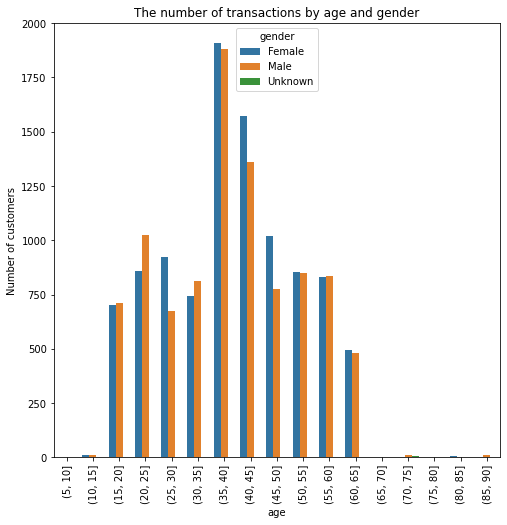

In [79]:
plt.figure(figsize=[8,8])
sb.countplot(data=df_old_all,x='bins',hue='gender')
plt.xticks(rotation=90);
plt.xlabel('age')
plt.ylabel('Number of customers')
plt.title('The number of transactions by age and gender')

The results of the above plot are consistent with the result of the customers age and gender distribution.

### Transactions over the states

<AxesSubplot:xlabel='state', ylabel='count'>

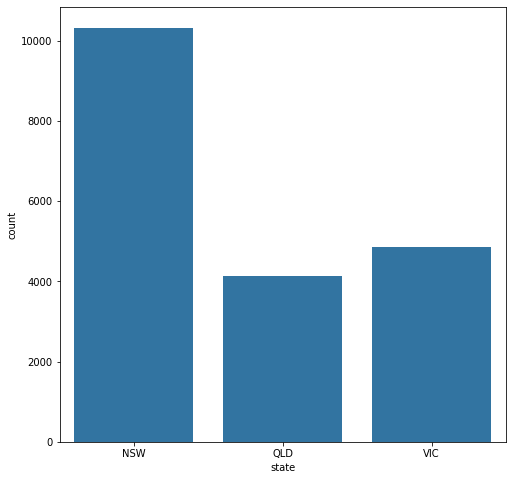

In [80]:
plt.figure(figsize=[8,8])
sb.countplot(data=df_old_all,x='state',color=base_color)

The majority of the purchases are in the North Wales States

In [123]:
#transform the postalcode to geogrphical coordinates for analysis on the counties level
def codetocity(x):
    '''Transform postcode to county'''
    if pd.isnull(x):
        return None
    else:
        nomi = pgeocode.Nominatim('au')
        county = nomi.query_postal_code(x)['county_name']
        return county

In [124]:
df_old_all['counties'] = df_old_all.postcode.apply(codetocity)

In [252]:
def longi(x):
    '''Transform postcode to coordinates of county'''
    if pd.isnull(x):
        return None
    else:
        nomi = pgeocode.Nominatim('au')
        long = nomi.query_postal_code(x)['longitude']
        return long

In [253]:
def lati(x):
    '''Transform postcode to county'''
    if pd.isnull(x):
        return None
    else:
        nomi = pgeocode.Nominatim('au')
        lat = nomi.query_postal_code(x)['latitude']
        return lat

In [254]:
df_old_all['longitude'] = df_old_all.postcode.apply(longi)
df_old_all['latitude'] = df_old_all.postcode.apply(lati)

In [125]:
""" for p in y['postcode']:
    #if yala.postcode.notnull().any():
    nomi = pgeocode.Nominatim('au')
    county = nomi.query_postal_code(p)['county_name']
    print(county) """

" for p in y['postcode']:\n    #if yala.postcode.notnull().any():\n    nomi = pgeocode.Nominatim('au')\n    county = nomi.query_postal_code(p)['county_name']\n    print(county) "

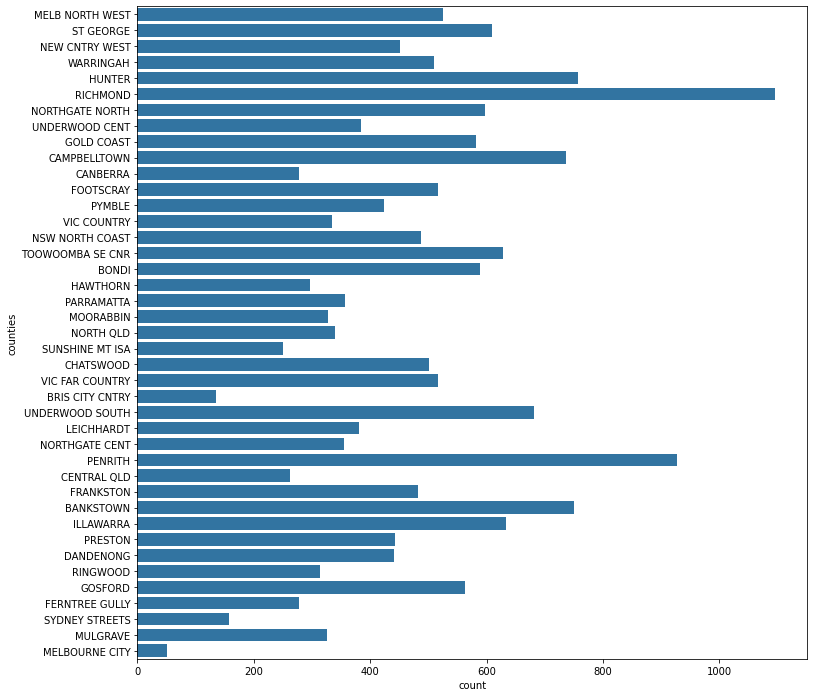

In [144]:
# by county 
plt.figure(figsize=[12,12])
sb.countplot(data=df_old_all,y='counties',color=base_color);

### Top products in term of quantities and profit.

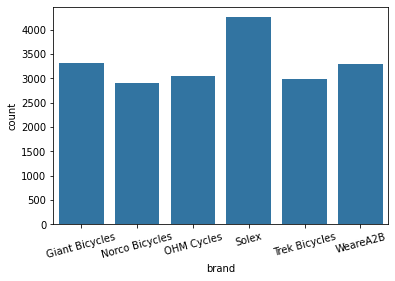

In [185]:
### Top sold brands
sb.countplot(data=df_old_all,x='brand',color=base_color)
plt.xticks(rotation=15);

Solex is the most popular brand.

<AxesSubplot:xlabel='product_class', ylabel='count'>

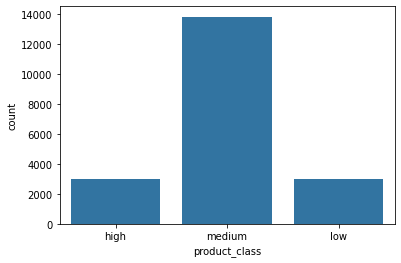

In [186]:
sb.countplot(data=df_old_all,x='product_class',color=base_color)

<AxesSubplot:xlabel='product_line', ylabel='count'>

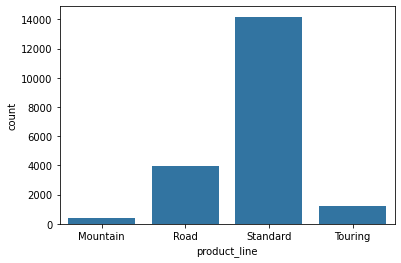

In [187]:
sb.countplot(data=df_old_all,x='product_line',color=base_color)

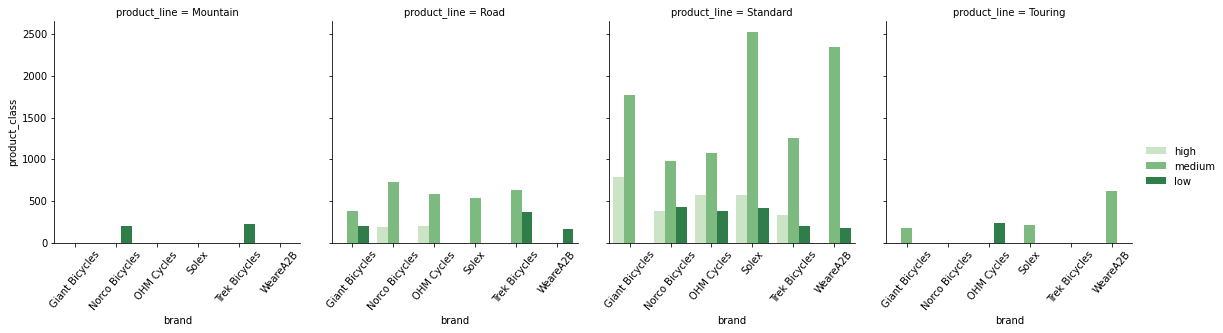

In [194]:
def countplot(x, hue, **kwargs):
    sb.countplot(x=x, hue=hue, **kwargs)

grid = sb.FacetGrid(data=df_old_all,col='product_line',size=4,aspect=1,col_wrap=4)
fig = grid.map(countplot,'brand','product_class',palette='Greens')
grid.set_xticklabels(rotation=50)
fig.add_legend();

It looks like the product line Standard, the brand Solex, and the class Medium are the most sold products.

In [197]:
df_old_all.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'year_of_birth', 'age', 'bins', 'counties'],
      dtype='object')

In [204]:
df_old_all['profit'] = df_old_all['list_price'] - df_old_all['standard_cost']

In [225]:
# sb.barplot(x=df_old_all.brand.unique(),y=df_old_all.groupby(['brand'])['list_price'].sum())
# plt.xticks(rotation=15)

In [182]:
#most sold brand, category, and line 
most_profitable_goods = df_old_all.groupby(['brand','product_line','product_class'])['list_price'].size()
most_profitable_goods=most_profitable_goods.reset_index(name='count')
most_profitable_goods = most_profitable_goods.pivot(index='brand',columns=['product_line','product_class'],values='count')

most_profitable_goods

product_line   Mountain             Road             Standard              \
product_class      high medium  low high medium  low     high medium  low   
brand                                                                       
Giant Bicycles        0      0    0    0    383  196      785   1769    0   
Norco Bicycles        0      0  200  191    732    0      375    980  432   
OHM Cycles            0      0    0  195    584    0      576   1079  380   
Solex                 0      0    0    0    537    0      566   2532  410   
Trek Bicycles         0      0  223    0    625  370      325   1254  193   
WeareA2B              0      0    0    0      0  157        0   2346  174   

product_line   Touring              
product_class     high medium  low  
brand                               
Giant Bicycles       0    179    0  
Norco Bicycles       0      0    0  
OHM Cycles           0      0  229  
Solex                0    208    0  
Trek Bicycles        0      0    0  
WeareA2B             0    618    0

<AxesSubplot:xlabel='product_line-product_class', ylabel='brand'>

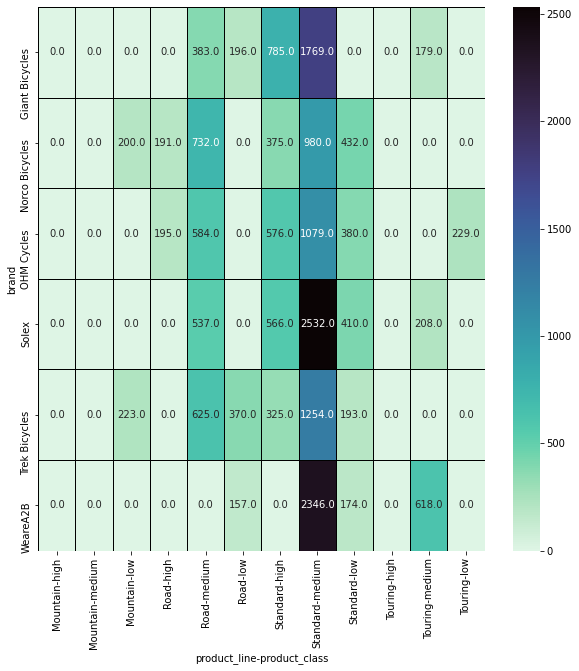

In [188]:
plt.figure(figsize=[10,10])
sb.heatmap(most_profitable_goods,annot=True,fmt='.1f',linewidths=.5,linecolor='black',cmap="mako_r");

Based on average profit from the prodcuts, the results are consistent with the results above about the quantutu of the sold products. The most profitable products are the standard, medium Solax.

### job industry category

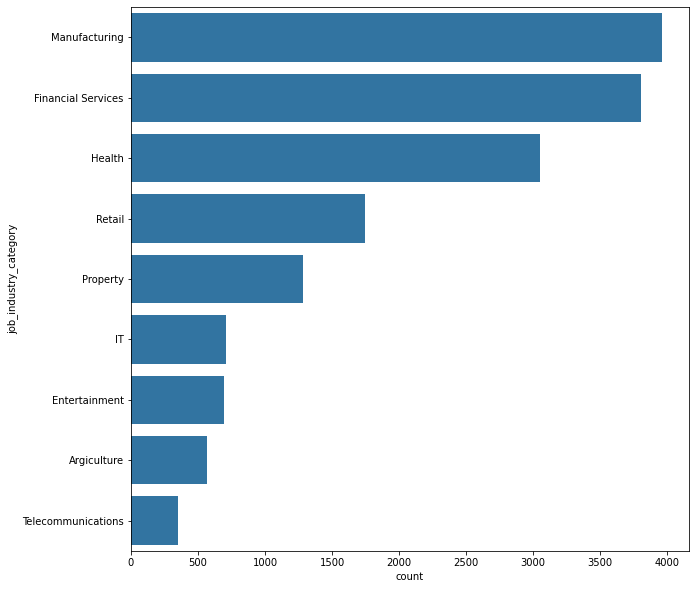

In [199]:
plt.figure(figsize=[10,10])
sb.countplot(data=df_old_all,y='job_industry_category',order=master.job_industry_category.value_counts().index,color=base_color);

Most customers work in the Manufacturing and financial services

### wealth segement

<AxesSubplot:xlabel='wealth_segment', ylabel='count'>

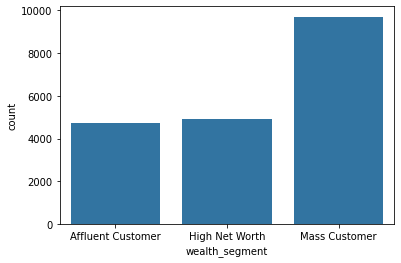

In [233]:
sb.countplot(data=df_old_all,x='wealth_segment',color=base_color)

In [ ]:
df_old_all.to_excel('tableau.xlsx',index=False)